In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Task
1. Use at least two models from different model family, based on the kind of DS task with details on why it was chosen. 
1. Perform feature selection & hyperparameter tuning both using normal method and leveraging automatic tuning 
1. Perform evaluation on atleast two different metrics for both the models. 


## Logistic Regression

Logistic Regression performs well when the dataset is linearly separable. It can interpret model coefficients as indicators of feature importance. It is also very fast and a common method used for binary classification.

In [26]:
# read raw dataset
df = pd.read_csv('Churn_Modelling_Assortment.csv')

In [27]:
# take selected features
X = df[['credit_score', 'age', 'tenure', 'balance',
       'num_products', 'has_credit_card', 'active_member', 'estimated_salary',
        'male', 'france', 'germany', 'spain']]
y = df['exited']
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# initialise model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# predict
predictions = logmodel.predict(X_test)
# evaluate
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2657
           1       0.45      0.08      0.14       643

    accuracy                           0.80      3300
   macro avg       0.63      0.53      0.51      3300
weighted avg       0.74      0.80      0.74      3300

[[2592   65]
 [ 590   53]]


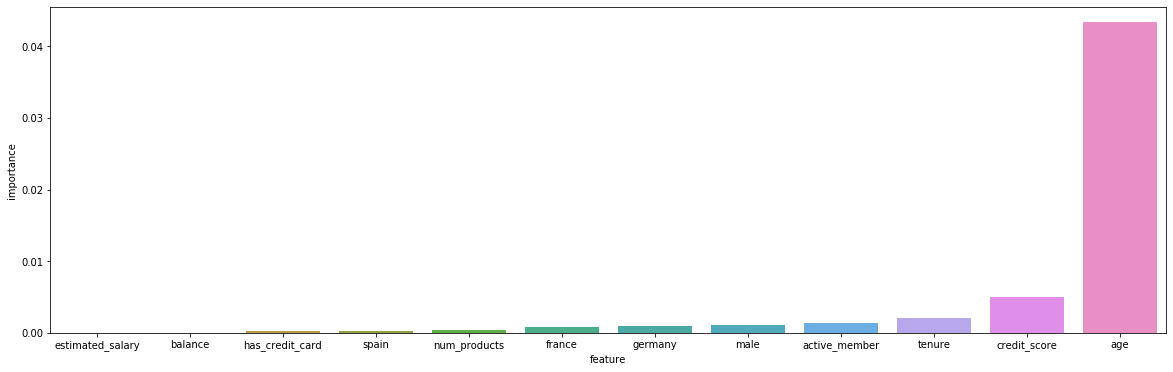

In [28]:
d = {'feature': X.columns, 'importance': logmodel.coef_[0]}
feat_imp = pd.DataFrame(data=d)

feat_imp['importance'] = feat_imp['importance'].abs()
feat_imp = feat_imp.sort_values(by=['importance'])

plt.figure(figsize=(20,6))
sns.barplot(x="feature", y="importance", data=feat_imp)

In [29]:
# try again with 
X = df[['credit_score', 'age', 'tenure', 'active_member','male', 'france', 'germany']]
y = df['exited']
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# initialise model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# predict
predictions = logmodel.predict(X_test)
# evaluate
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2657
           1       0.57      0.22      0.32       643

    accuracy                           0.82      3300
   macro avg       0.70      0.59      0.61      3300
weighted avg       0.78      0.82      0.78      3300

[[2550  107]
 [ 501  142]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


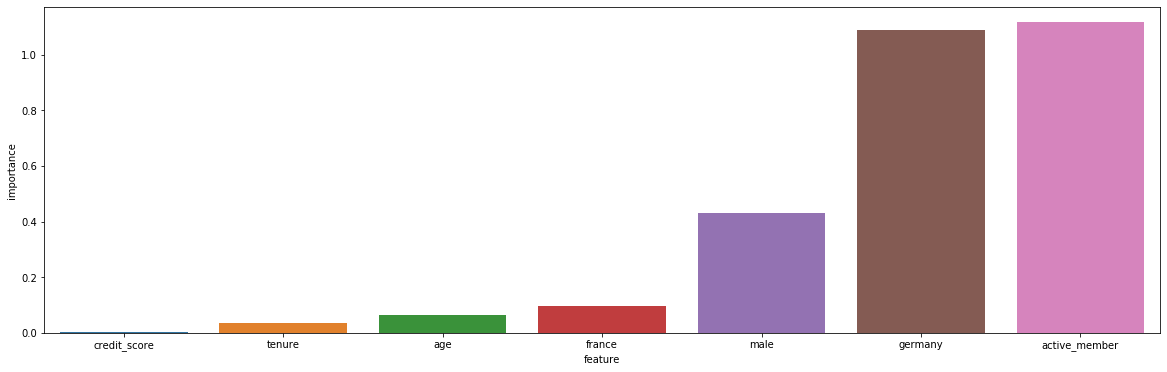

In [30]:
d = {'feature': X.columns, 'importance': logmodel.coef_[0]}
feat_imp = pd.DataFrame(data=d)

feat_imp['importance'] = feat_imp['importance'].abs()
feat_imp = feat_imp.sort_values(by=['importance'])

plt.figure(figsize=(20,6))
sns.barplot(x="feature", y="importance", data=feat_imp)

Conclusions: This model initially has an average f1 score of 51%, and with feature engineering this increases to 61%. Not great.

## KNN

The KNN classification algorithm is often used for classifying the data, as well as for regression on continuous numeric data. It is used for not just binary classification but for multilevel classifications too. It is a non-parametric machine learning method implying that it doesn’t make any assumptions about the data. It also doesn’t make any generalizations, and simply checks the neighboring data points to determine the classification of unknown or uncategorized data points. 

In [31]:
X = df[['credit_score', 'age', 'tenure', 'balance',
       'num_products', 'has_credit_card', 'active_member', 'estimated_salary',
        'male', 'france', 'germany', 'spain']]
y = df['exited']

In [32]:
# need to use a scalar for knn to normalise the data in each axis
scaler = StandardScaler()
scaler.fit(X)

scaled_features = scaler.transform(X)

#convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**
df_feat = pd.DataFrame(scaled_features,columns=X.columns)
df_feat.head()


X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.30)

# Using n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2392
           1       0.49      0.46      0.48       608

    accuracy                           0.80      3000
   macro avg       0.68      0.67      0.67      3000
weighted avg       0.79      0.80      0.79      3000

[[2106  286]
 [ 329  279]]


Average f1 score is 68%

Text(0, 0.5, 'Error Rate')

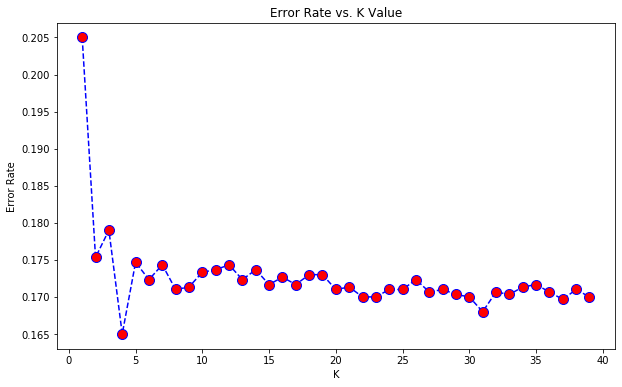

In [33]:
# Looping through options for n
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



In [34]:
# Chose k=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


WITH K=30


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2392
           1       0.67      0.30      0.41       608

    accuracy                           0.83      3000
   macro avg       0.76      0.63      0.66      3000
weighted avg       0.81      0.83      0.80      3000

[[2303   89]
 [ 426  182]]


## Decision Tree

In [35]:
X = df[['credit_score', 'age', 'tenure', 'balance',
       'num_products', 'has_credit_card', 'active_member', 'estimated_salary',
        'male', 'france', 'germany', 'spain']]
y = df['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

## Predictions and Evaluation of Decision Tree

predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2393
           1       0.45      0.50      0.47       607

    accuracy                           0.77      3000
   macro avg       0.66      0.67      0.66      3000
weighted avg       0.78      0.77      0.78      3000

[[2021  372]
 [ 306  301]]


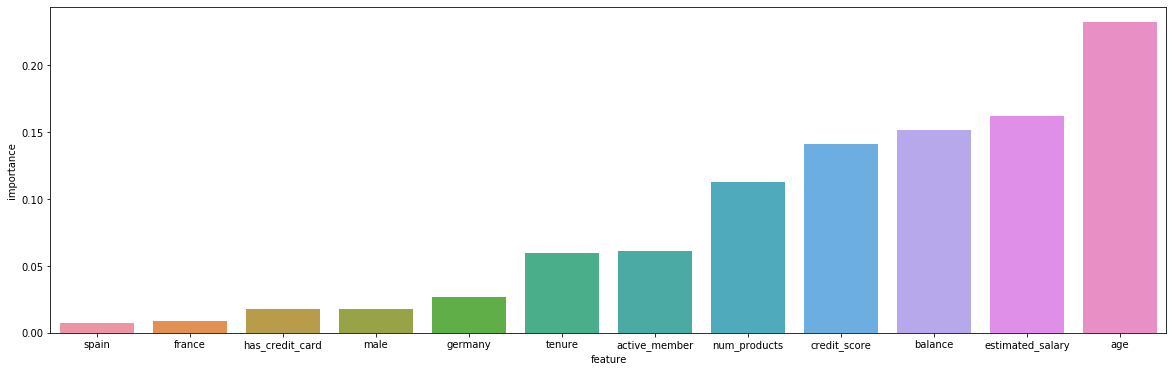

In [36]:
d = {'feature': X.columns, 'importance': dtree.feature_importances_}
feat_imp = pd.DataFrame(data=d)

feat_imp['importance'] = feat_imp['importance'].abs()
feat_imp = feat_imp.sort_values(by=['importance'])

plt.figure(figsize=(20,6))
sns.barplot(x="feature", y="importance", data=feat_imp)

In [37]:
X = df[['credit_score', 'age', 'tenure', 'balance',
       'num_products', 'active_member', 'estimated_salary']]
y = df['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

## Predictions and Evaluation of Decision Tree

predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2394
           1       0.45      0.43      0.44       606

    accuracy                           0.78      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.78      0.78      0.78      3000

[[2072  322]
 [ 344  262]]


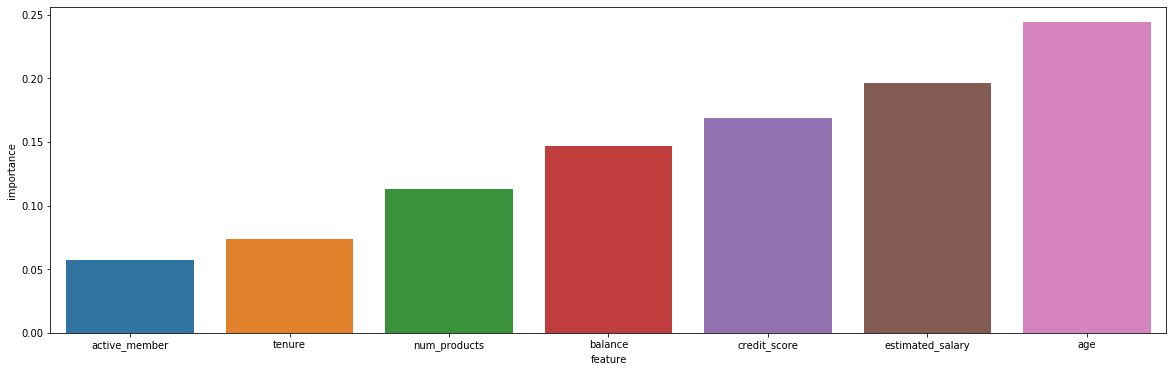

In [38]:
d = {'feature': X.columns, 'importance': dtree.feature_importances_}
feat_imp = pd.DataFrame(data=d)

feat_imp['importance'] = feat_imp['importance'].abs()
feat_imp = feat_imp.sort_values(by=['importance'])

plt.figure(figsize=(20,6))
sns.barplot(x="feature", y="importance", data=feat_imp)

## Grid Search to tune variables

In [39]:
X = df[['credit_score', 'age', 'tenure', 'balance',
       'num_products', 'active_member', 'estimated_salary']]
y = df['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
## Gridsearch for automatic parameter tuning
tree_param = {'random_state':[0,1,2],
              'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10]}

grid = GridSearchCV(DecisionTreeClassifier(),tree_param,refit=True,verbose=2)
grid.fit(X_train,y_train)

grid_predictions = grid.predict(X_test)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] criterion=gini, max_depth=1, random_state=0 .....................
[CV] ...... criterion=gini, max_depth=1, random_state=0, total=   0.0s
[CV] criterion=gini, max_depth=1, random_state=0 .....................
[CV] ...... criterion=gini, max_depth=1, random_state=0, total=   0.0s
[CV] criterion=gini, max_depth=1, random_state=0 .....................
[CV] ...... criterion=gini, max_depth=1, random_state=0, total=   0.0s
[CV] criterion=gini, max_depth=1, random_state=0 .....................
[CV] ...... criterion=gini, max_depth=1, random_state=0, total=   0.0s
[CV] criterion=gini, max_depth=1, random_state=0 .....................
[CV] ...... criterion=gini, max_depth=1, random_state=0, total=   0.0s
[CV] criterion=gini, max_depth=1, random_state=1 .....................
[CV] ...... criterion=gini, max_depth=1, random_state=1, total=   0.0s
[CV] criterion=gini, max_depth=1, random_state=1 .....................
[CV] ...... cri

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...... criterion=gini, max_depth=2, random_state=0, total=   0.0s
[CV] criterion=gini, max_depth=2, random_state=0 .....................
[CV] ...... criterion=gini, max_depth=2, random_state=0, total=   0.0s
[CV] criterion=gini, max_depth=2, random_state=0 .....................
[CV] ...... criterion=gini, max_depth=2, random_state=0, total=   0.0s
[CV] criterion=gini, max_depth=2, random_state=1 .....................
[CV] ...... criterion=gini, max_depth=2, random_state=1, total=   0.0s
[CV] criterion=gini, max_depth=2, random_state=1 .....................
[CV] ...... criterion=gini, max_depth=2, random_state=1, total=   0.0s
[CV] criterion=gini, max_depth=2, random_state=1 .....................
[CV] ...... criterion=gini, max_depth=2, random_state=1, total=   0.0s
[CV] criterion=gini, max_depth=2, random_state=1 .....................
[CV] ...... criterion=gini, max_depth=2, random_state=1, total=   0.0s
[CV] criterion=gini, max_depth=2, random_state=1 .....................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    5.3s finished


In [40]:
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2383
           1       0.82      0.33      0.47       617

    accuracy                           0.85      3000
   macro avg       0.83      0.65      0.69      3000
weighted avg       0.84      0.85      0.82      3000

[[2338   45]
 [ 415  202]]


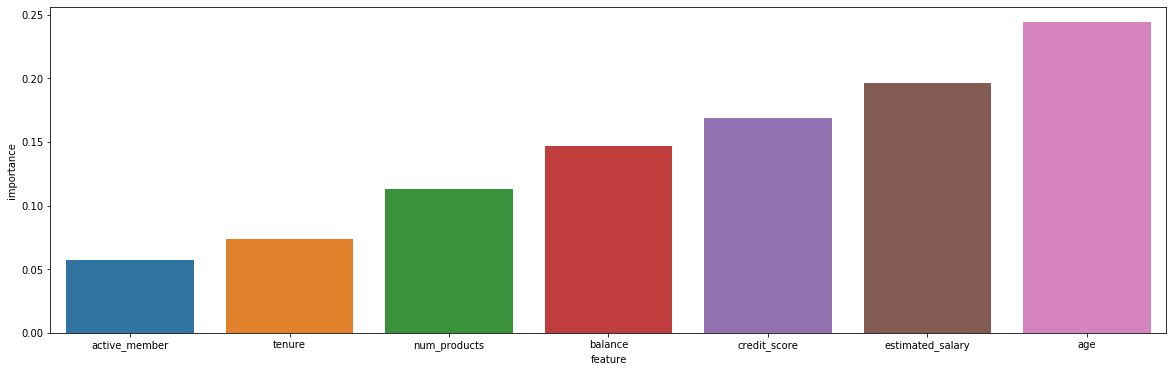

In [41]:
d = {'feature': X.columns, 'importance': dtree.feature_importances_}
feat_imp = pd.DataFrame(data=d)

feat_imp['importance'] = feat_imp['importance'].abs()
feat_imp = feat_imp.sort_values(by=['importance'])

plt.figure(figsize=(20,6))
sns.barplot(x="feature", y="importance", data=feat_imp)